# Reference
1. https://python.plainenglish.io/a23-linear-regression-part-2-hands-on-with-complete-code-9dfec493bee8
2. https://python.plainenglish.io/a24-linear-regression-part-3-hands-on-with-complete-code-fbe288752708
3. CONTINUE FROM: https://python.plainenglish.io/a25-linear-regression-part-4-hands-on-cross-validation-readings-resources-r-square-vs-bed1b79dabab

# SECTION 1: Introduction

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Setting display format to retina in matplolib
# to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [54]:
import sklearn, matplotlib
from platform import python_version # To check the python version
print("So we are using the following versions.")
print("Our python version is: ", python_version())
print("scikit-learn version: ", sklearn.__version__)
print("numpy version: ", np.__version__)
print("pandas version: ", pd.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("seaborn version: ", sns.__version__)

So we are using the following versions.
Our python version is:  3.10.12
scikit-learn version:  1.1.0
numpy version:  1.23.5
pandas version:  1.5.3
matplotlib version:  3.7.1
seaborn version:  0.12.2


In [55]:
!pip install scikit-learn==1.1

In [56]:
from sklearn import datasets

In [57]:
'''
data_url = "http://lib.stat.cmu.edu/datasets/boston"
bh = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
'''

bh = datasets.load_boston()

'''
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
bh = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
'''

'\ndata_url = "http://lib.stat.cmu.edu/datasets/boston"\nraw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)\nbh = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])\ntarget = raw_df.values[1::2, 2]\n'

In [58]:
bh.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [59]:
print(bh['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [60]:
# feature or column names are:
bh.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [61]:
# creating dataframe using data and feature_names
df = pd.DataFrame(data=bh.data, columns=bh.feature_names)

# adding price column
df['price'] = bh.target

df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [63]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# SECTION 2: Exploratory Data Analysis (EDA)

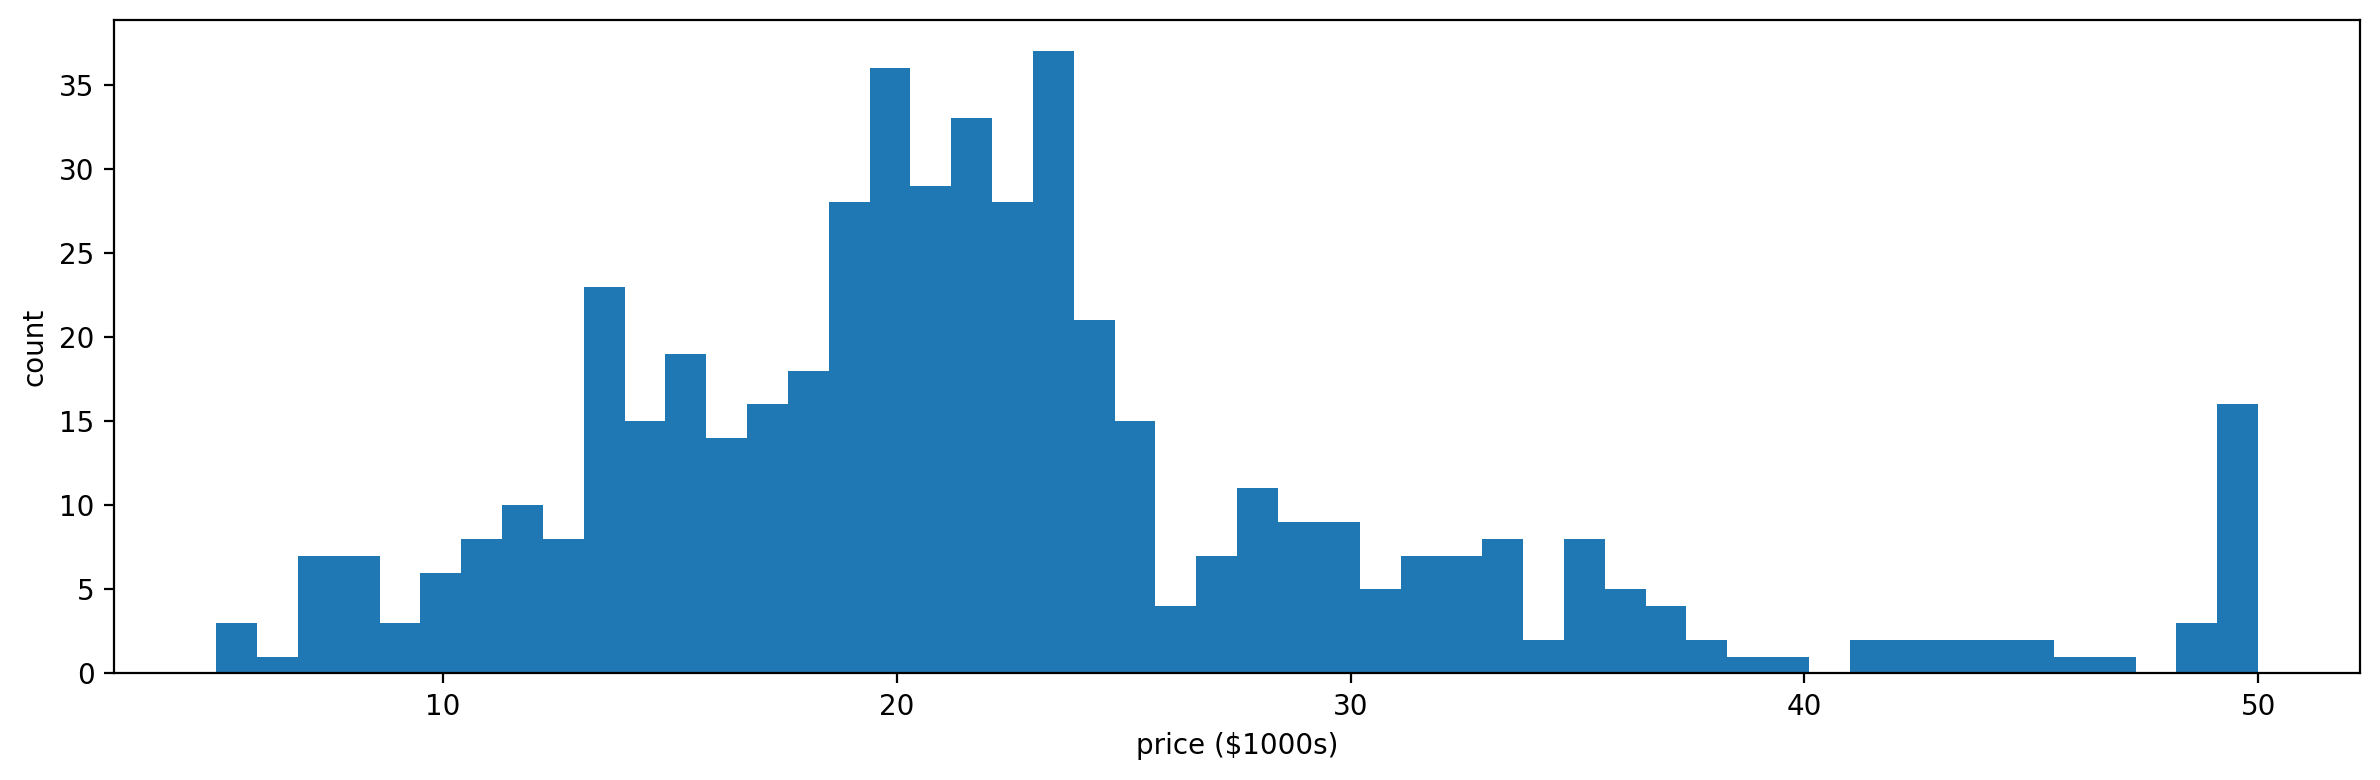

In [64]:
# Housing price (target) histogram

plt.figure(figsize=(12,4))
plt.hist(x=df['price'], bins=50)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

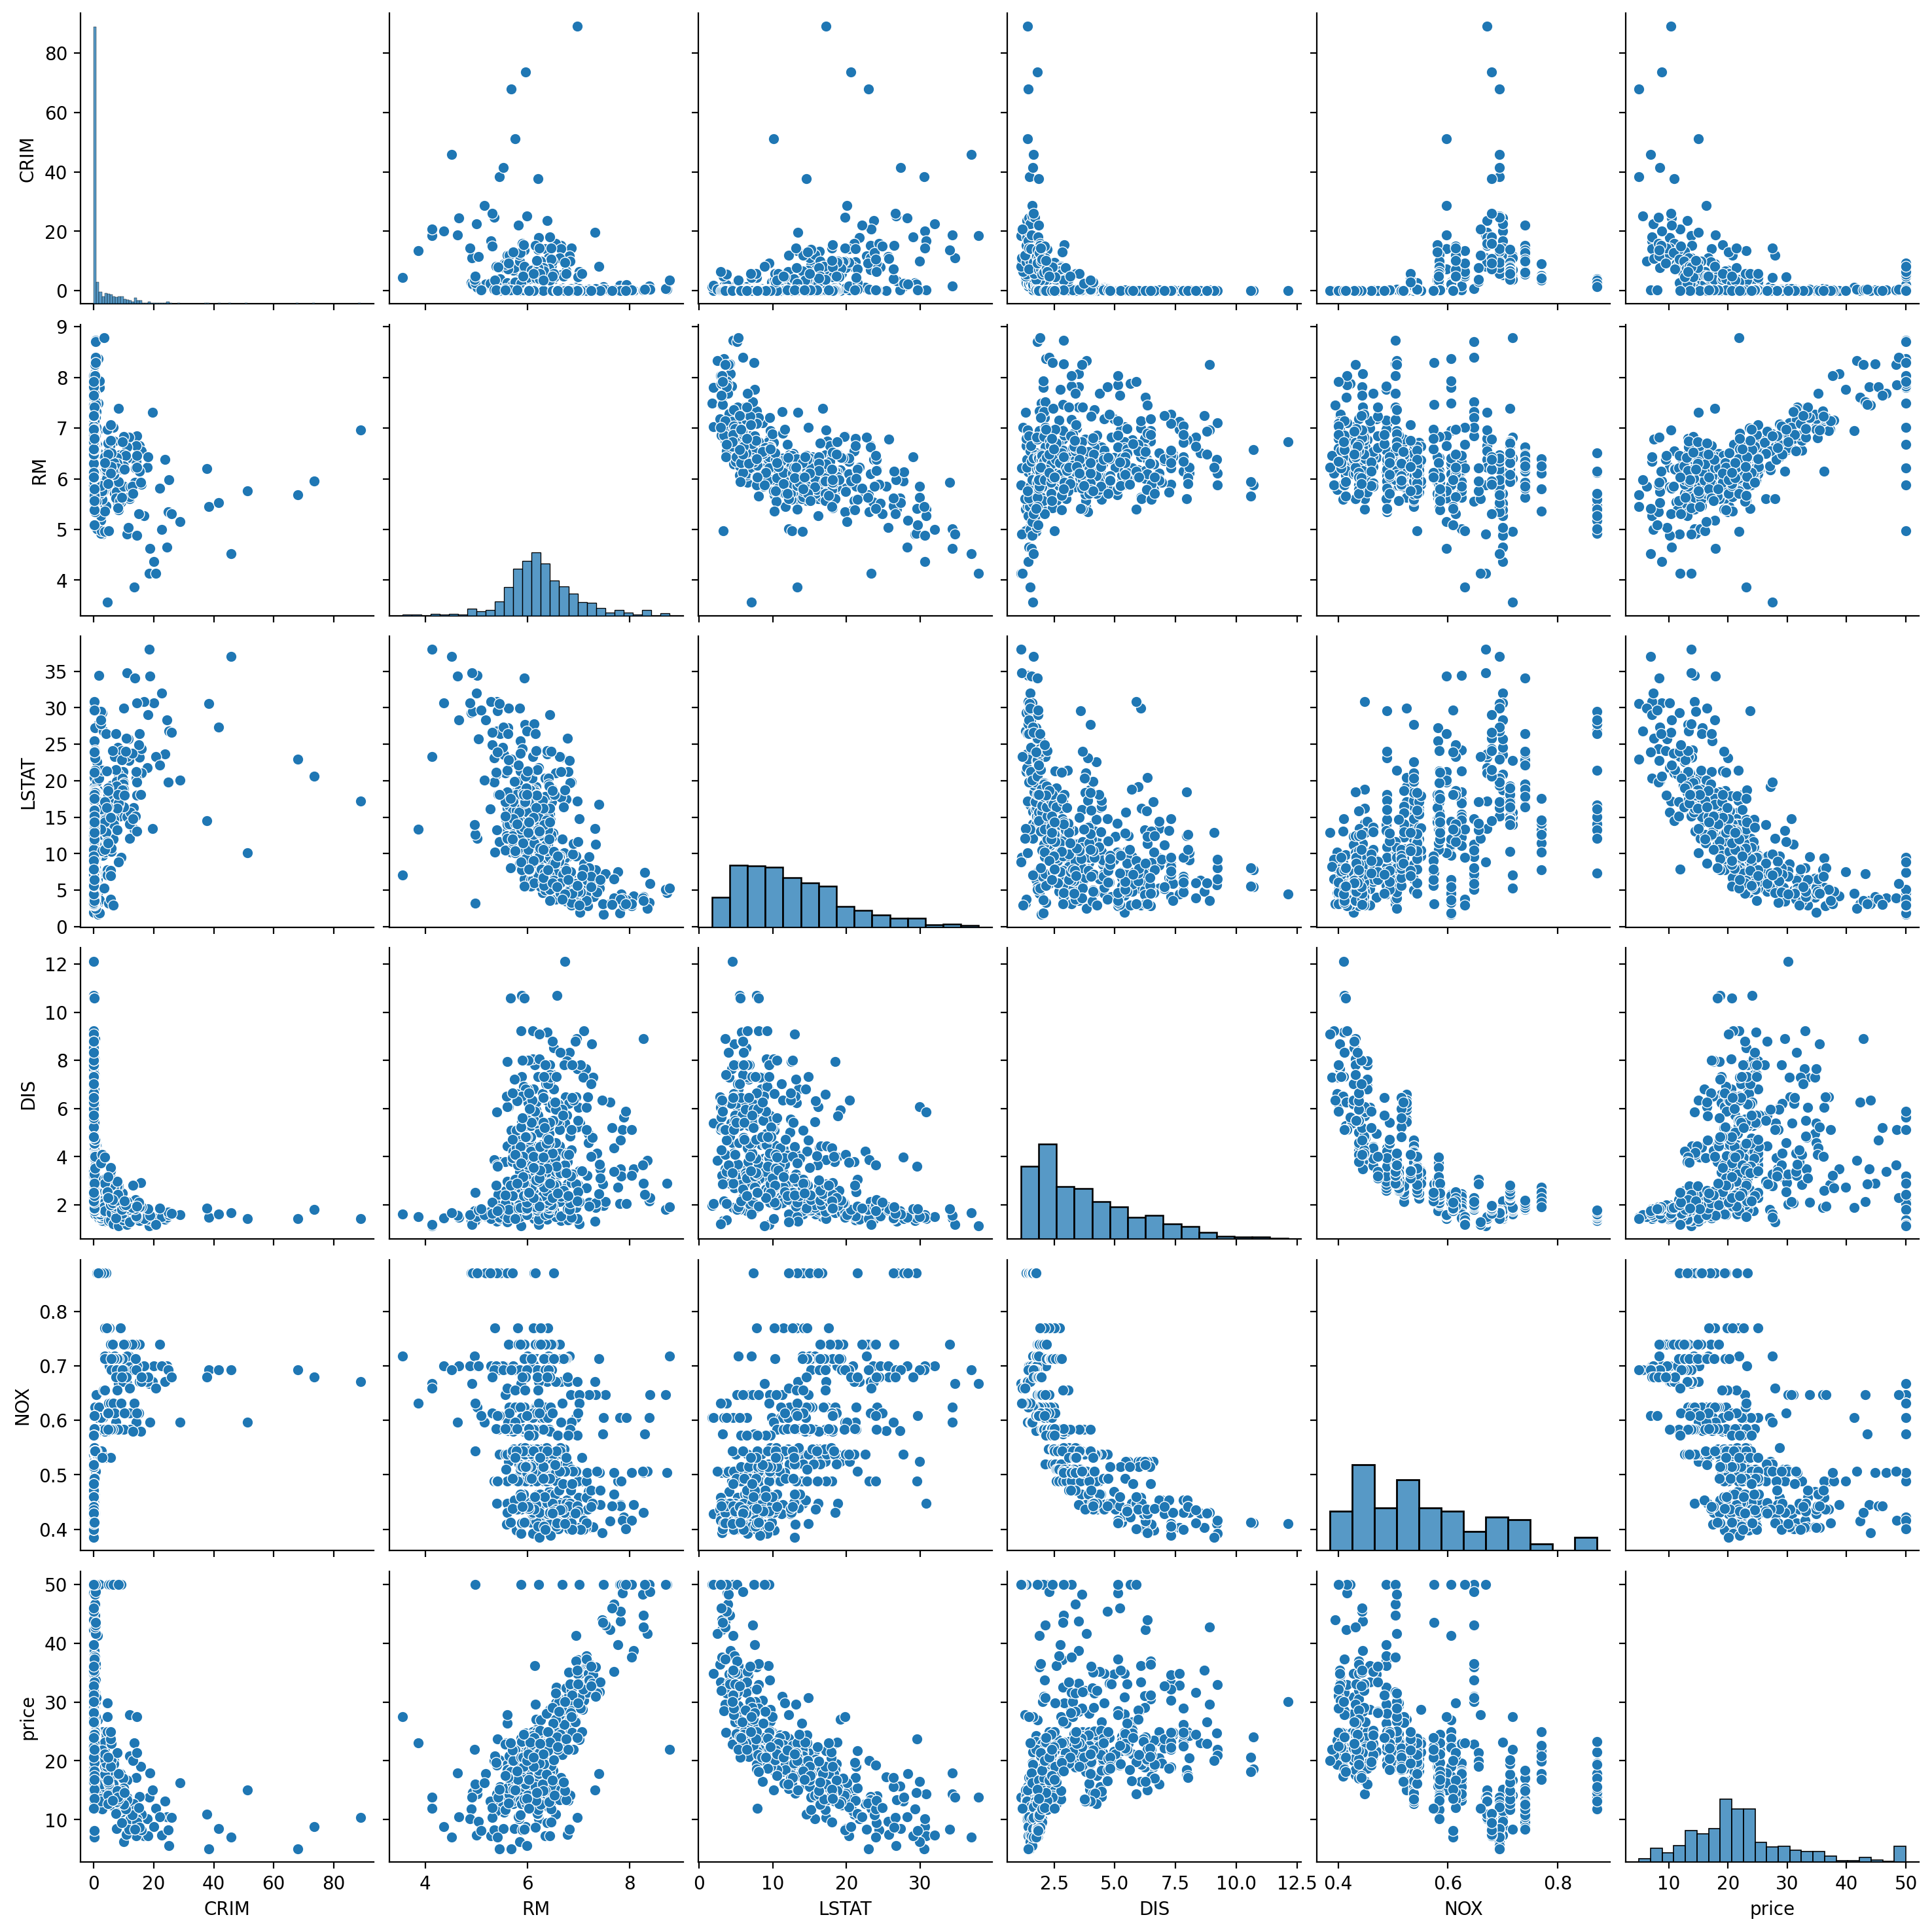

In [65]:
# Getting pairplot for selected features
sns.pairplot(data=df[['CRIM', 'RM', 'LSTAT', 'DIS', 'NOX', 'price']])

**Bottom Row**:
1. As the number of rooms (RM) increases, price increases.
2. As LSTAT (% lower status of population) increases, price decreases.
3. As NOX (nitrogen oxides concentration in parts per 10 million) increases, price decreases.

# SECTION 3: Variance and Covariance

<Axes: >

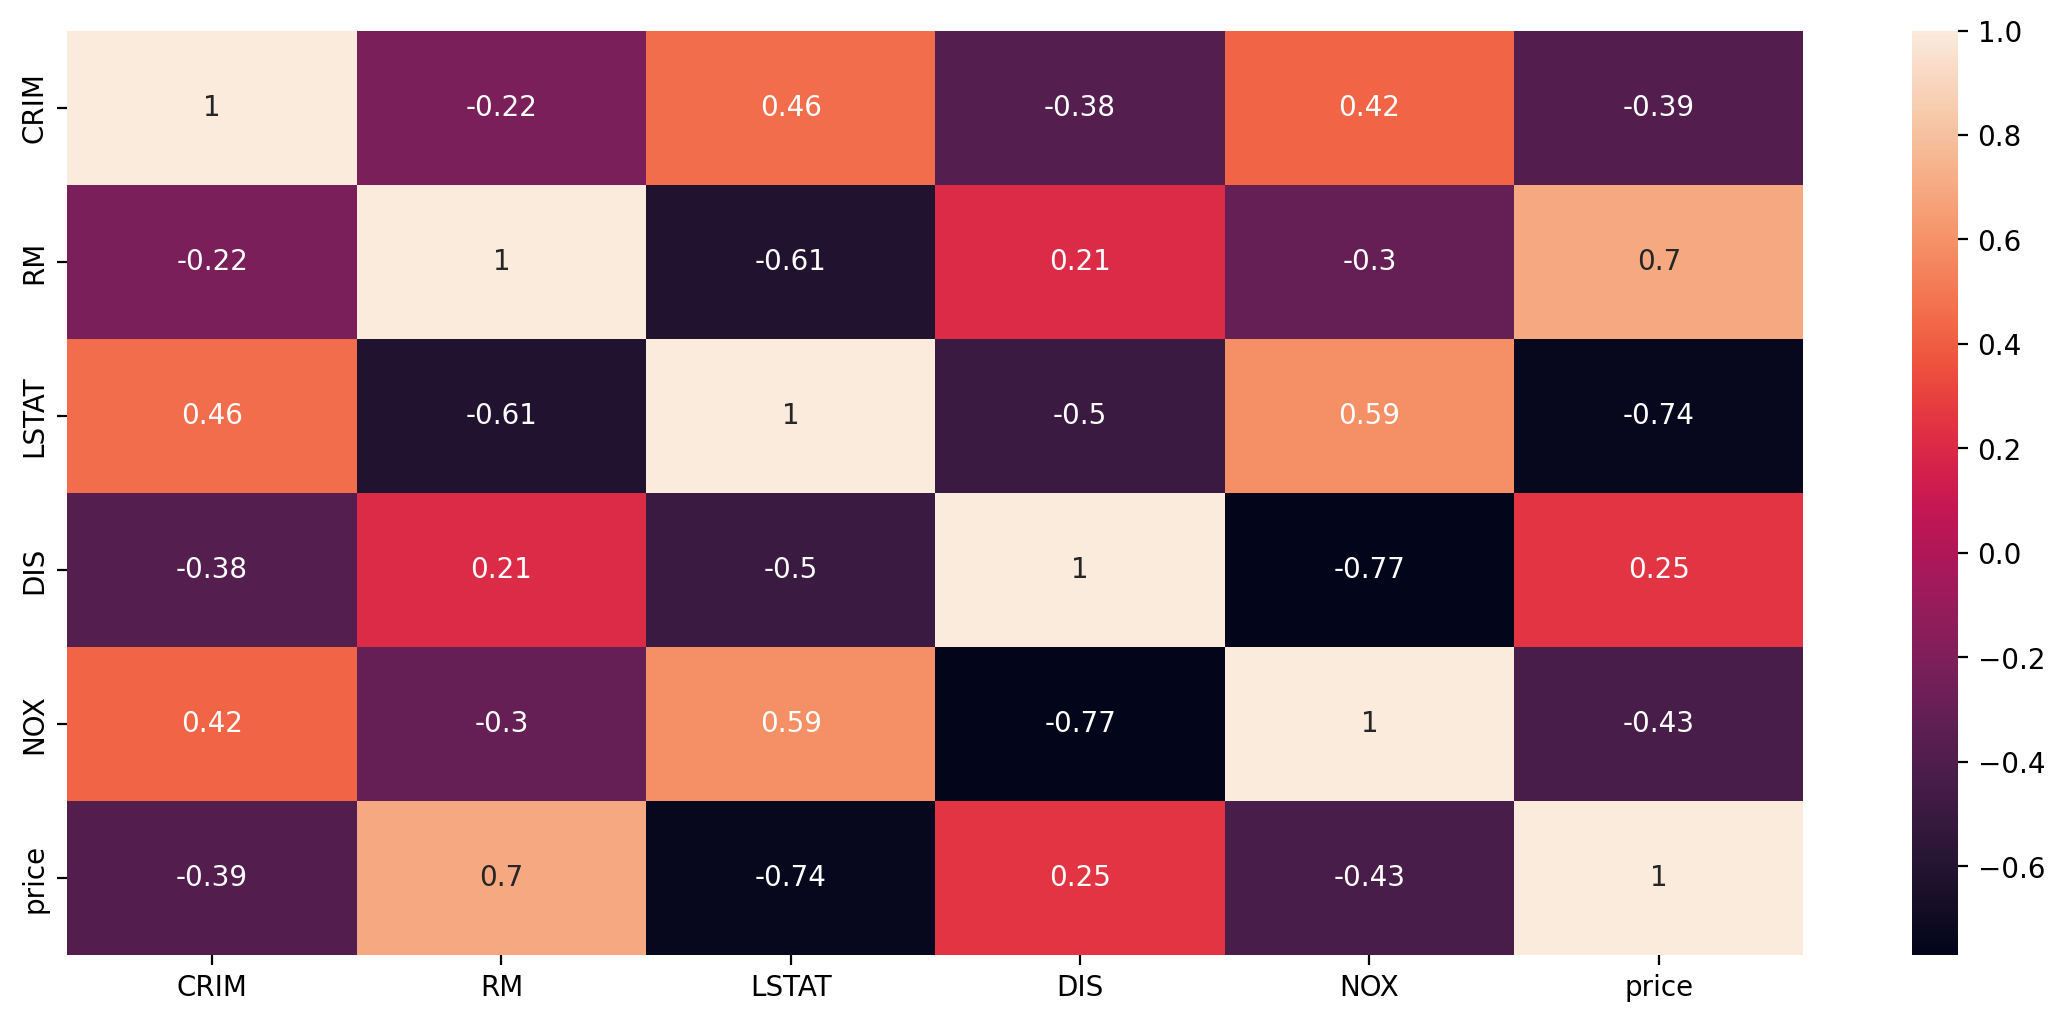

In [66]:
# Heatmap to visualize the correlations
# between selected features and price of the house.
plt.figure(figsize=(14,6))

# Compute pairwaise correlation of columns using corr()
pairwise_correlations = df[['CRIM', 'RM', 'LSTAT', 'DIS', 'NOX',
                            'price']].corr()

# Getting the heatmap
sns.heatmap(data=pairwise_correlations, annot=True)
# annot = True will put the values on the map

1. Number of rooms (RM) have the highest positive correlation with price.
2. Crime rate (CRIM), population status (LSTAT), and nitric oxides concentration (NOX) are negatively correlated with the price.
3. LSTAT is negatively correlated with RM.

# SECTION 4: Machine Learning

In [67]:
df[['CRIM', 'RM', 'LSTAT', 'DIS', 'NOX', 'price']].head(2)

,CRIM,RM,LSTAT,DIS,NOX,price
0,0.00632,6.575,4.98,4.0900,0.538,24.0
1,0.02731,6.421,9.14,4.9671,0.469,21.6


In [68]:
X = df[['CRIM', 'RM', 'LSTAT', 'DIS', 'NOX']]
y = df['price'] # target

In [69]:
X.head(2)

,CRIM,RM,LSTAT,DIS,NOX
0,0.00632,6.575,4.98,4.0900,0.538
1,0.02731,6.421,9.14,4.9671,0.469


## SECTION 4.1: Standardization - Feature Scaling

In [70]:
# This is how X (original unscaled features) looks like:
print("Original Unscaled Features:")
print("ZN Mean: ", round(X.CRIM.mean(),3),
      "NZ Var: ", round(np.var(X.CRIM),3))
print("LSTAT Mean: ", round(X.LSTAT.mean(),3), "LSTAT Var: ",
      round(np.var(X.LSTAT),3))
X.head(2)

Original Unscaled Features:
ZN Mean:  3.614 NZ Var:  73.84
LSTAT Mean:  12.653 LSTAT Var:  50.894


,CRIM,RM,LSTAT,DIS,NOX
0,0.00632,6.575,4.98,4.0900,0.538
1,0.02731,6.421,9.14,4.9671,0.469


In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler # MinMaxScaler
scaler = StandardScaler() # Creating an instance of StandardScaler()
scaler.fit(X) # fitting the features

import pickle
# Save the transformation
pickle.dump(obj=scaler, file=open(file='/content/drive/MyDrive/transformation.pkl', mode='wb'))
# Loading saved transformation
scaler = pickle.load(file=open(file='/content/drive/MyDrive/transformation.pkl', mode='rb'))
X_scaled = scaler.transform(X) # transforming features

In [73]:
# check the difference
# create a dataframe for scaled features
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("Scaled features (0 mean, 1 variance): ")
print("ZN Mean: ", round(X_scaled.CRIM.mean(),3),
      "NZ Var: ", round(np.var(X_scaled.CRIM),3))
print("LSTAT Mean: ", round(X_scaled.LSTAT.mean(),3),
      "LSTAT Var: ", round(np.var(X_scaled.LSTAT),3))
X_scaled.head(2)

Scaled features (0 mean, 1 variance): 
ZN Mean:  -0.0 NZ Var:  1.0
LSTAT Mean:  -0.0 LSTAT Var:  1.0


,CRIM,RM,LSTAT,DIS,NOX
0,-0.419782,0.413672,-1.075562,0.140214,-0.144217
1,-0.417339,0.194274,-0.492439,0.557160,-0.740262


So, the features are *scaled* to **0 mean 1 variance** using StandardScaler() module.

## SECTION 4.2: Linear Regression Model Training

In [74]:
# importing train_test_split
from sklearn.model_selection import train_test_split

# passing X and y along with other parameters to get
# X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = \
train_test_split(X_scaled, y, random_state=101)

In [75]:
# LinearRegression model is a part of linear_model
from sklearn import linear_model

In [76]:
lm = linear_model.LinearRegression()

In [77]:
lm = lm.fit(X_train, y_train)

## SECTION 4.3: Model Coefficients

In [78]:
print(lm.intercept_)

22.3960437098046


In [79]:
lm.coef_

array([-0.83988854,  3.3061785 , -4.78043349, -2.31876542, -1.37608871])

In [80]:
# Our colums are
X.columns
# X_train.columns

Index(['CRIM', 'RM', 'LSTAT', 'DIS', 'NOX'], dtype='object')

In [81]:
X_train.columns

Index(['CRIM', 'RM', 'LSTAT', 'DIS', 'NOX'], dtype='object')

In [82]:
# Creating dataframe with features and their coefficient values
coeffs = pd.DataFrame(data=lm.coef_, index=X.columns,
                      columns=['Coefficient'])
coeffs

,Coefficient
CRIM,-0.839889
RM,3.306179
LSTAT,-4.780433
DIS,-2.318765
NOX,-1.376089


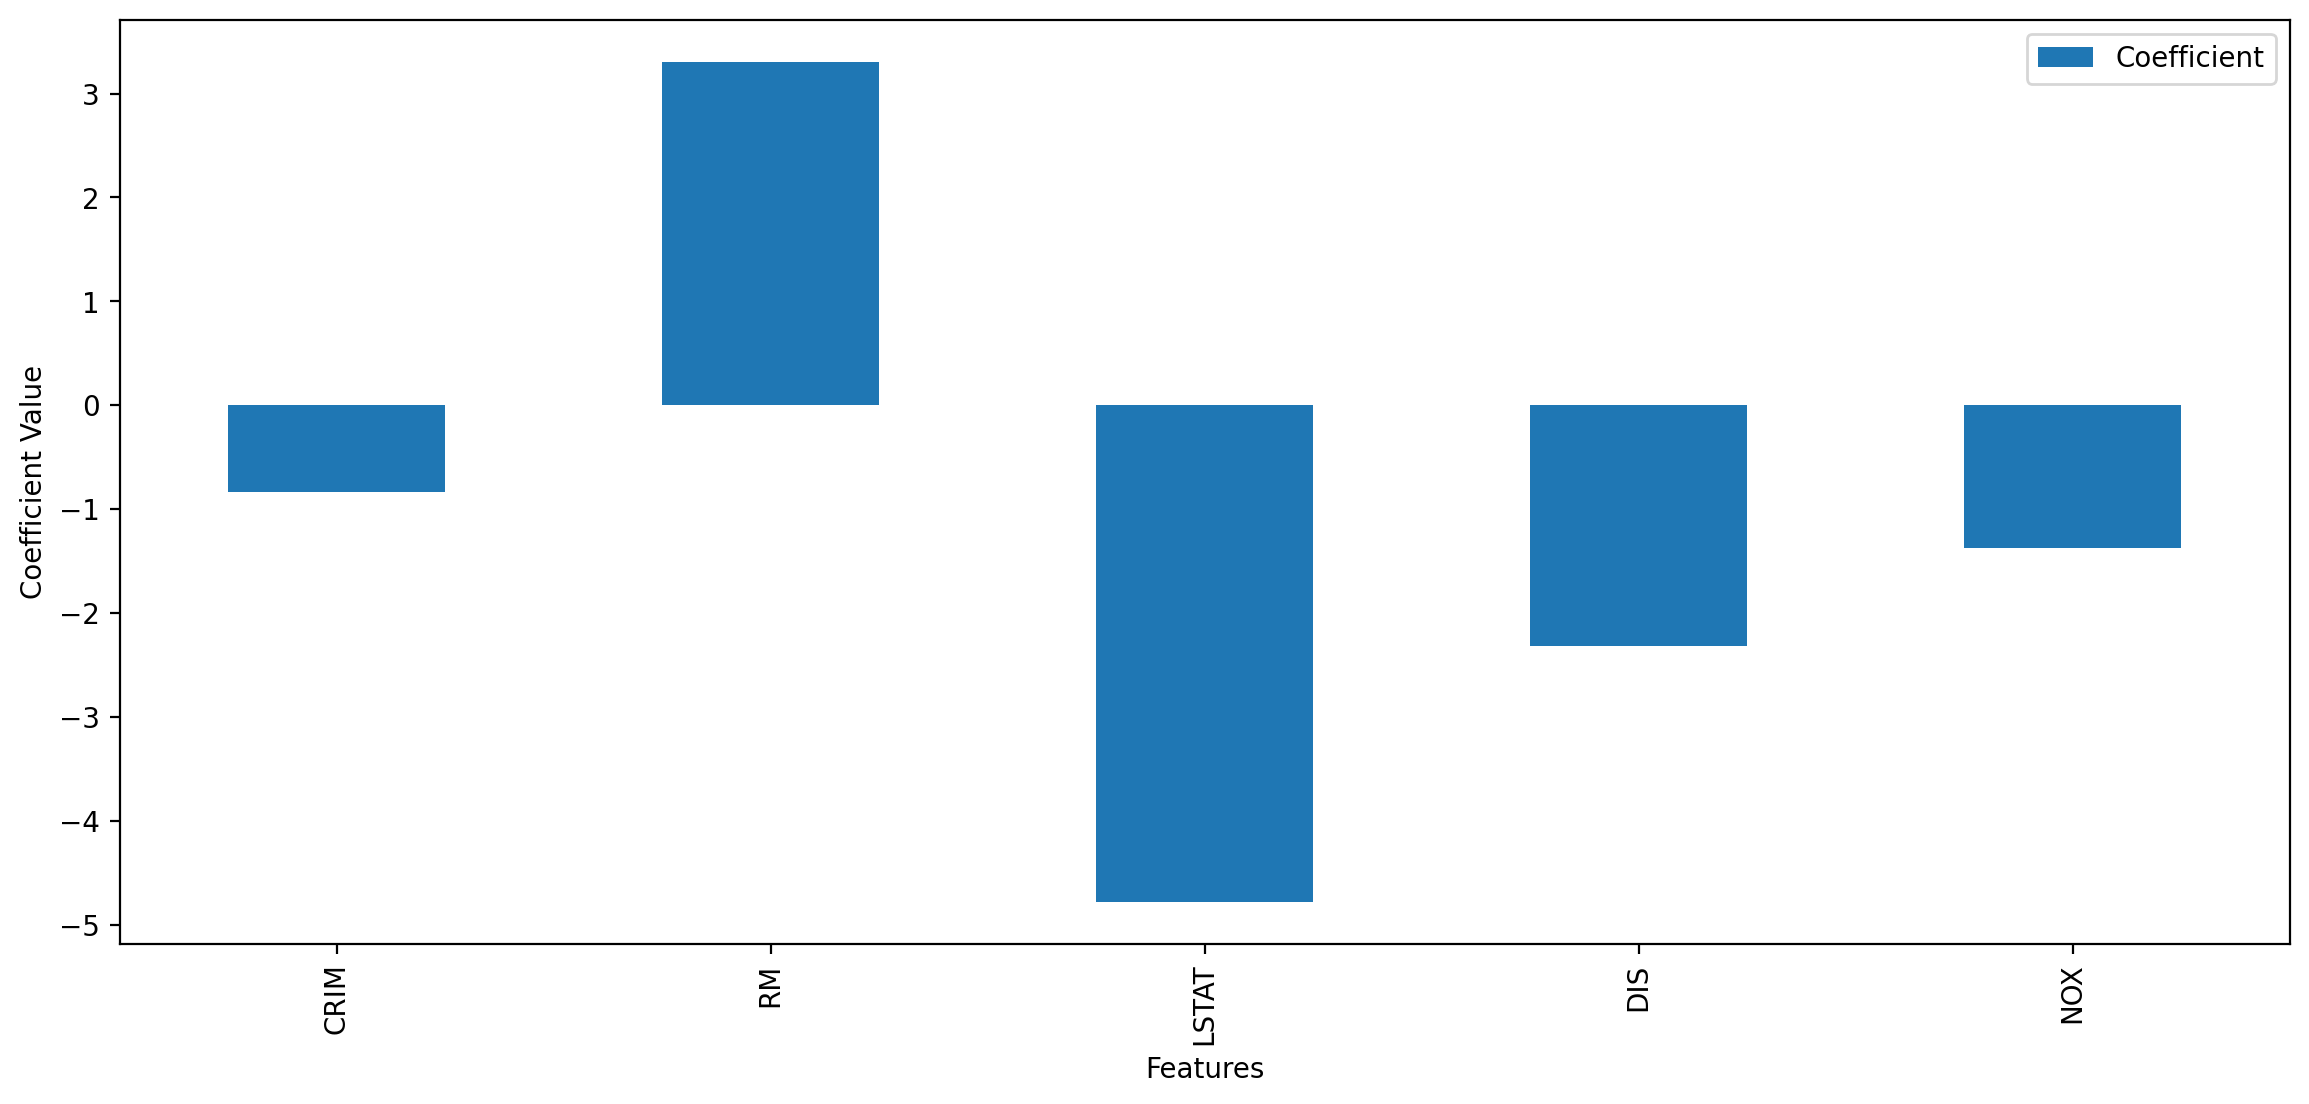

In [83]:
# Using panda's built-in visualization
coeffs.plot(kind='bar', figsize=(14,6))
plt.xlabel('Features');
plt.ylabel('Coefficient Value');

## SECTION 4.4: Predictions from Trained Model

In [84]:
predictions = lm.predict(X_test)

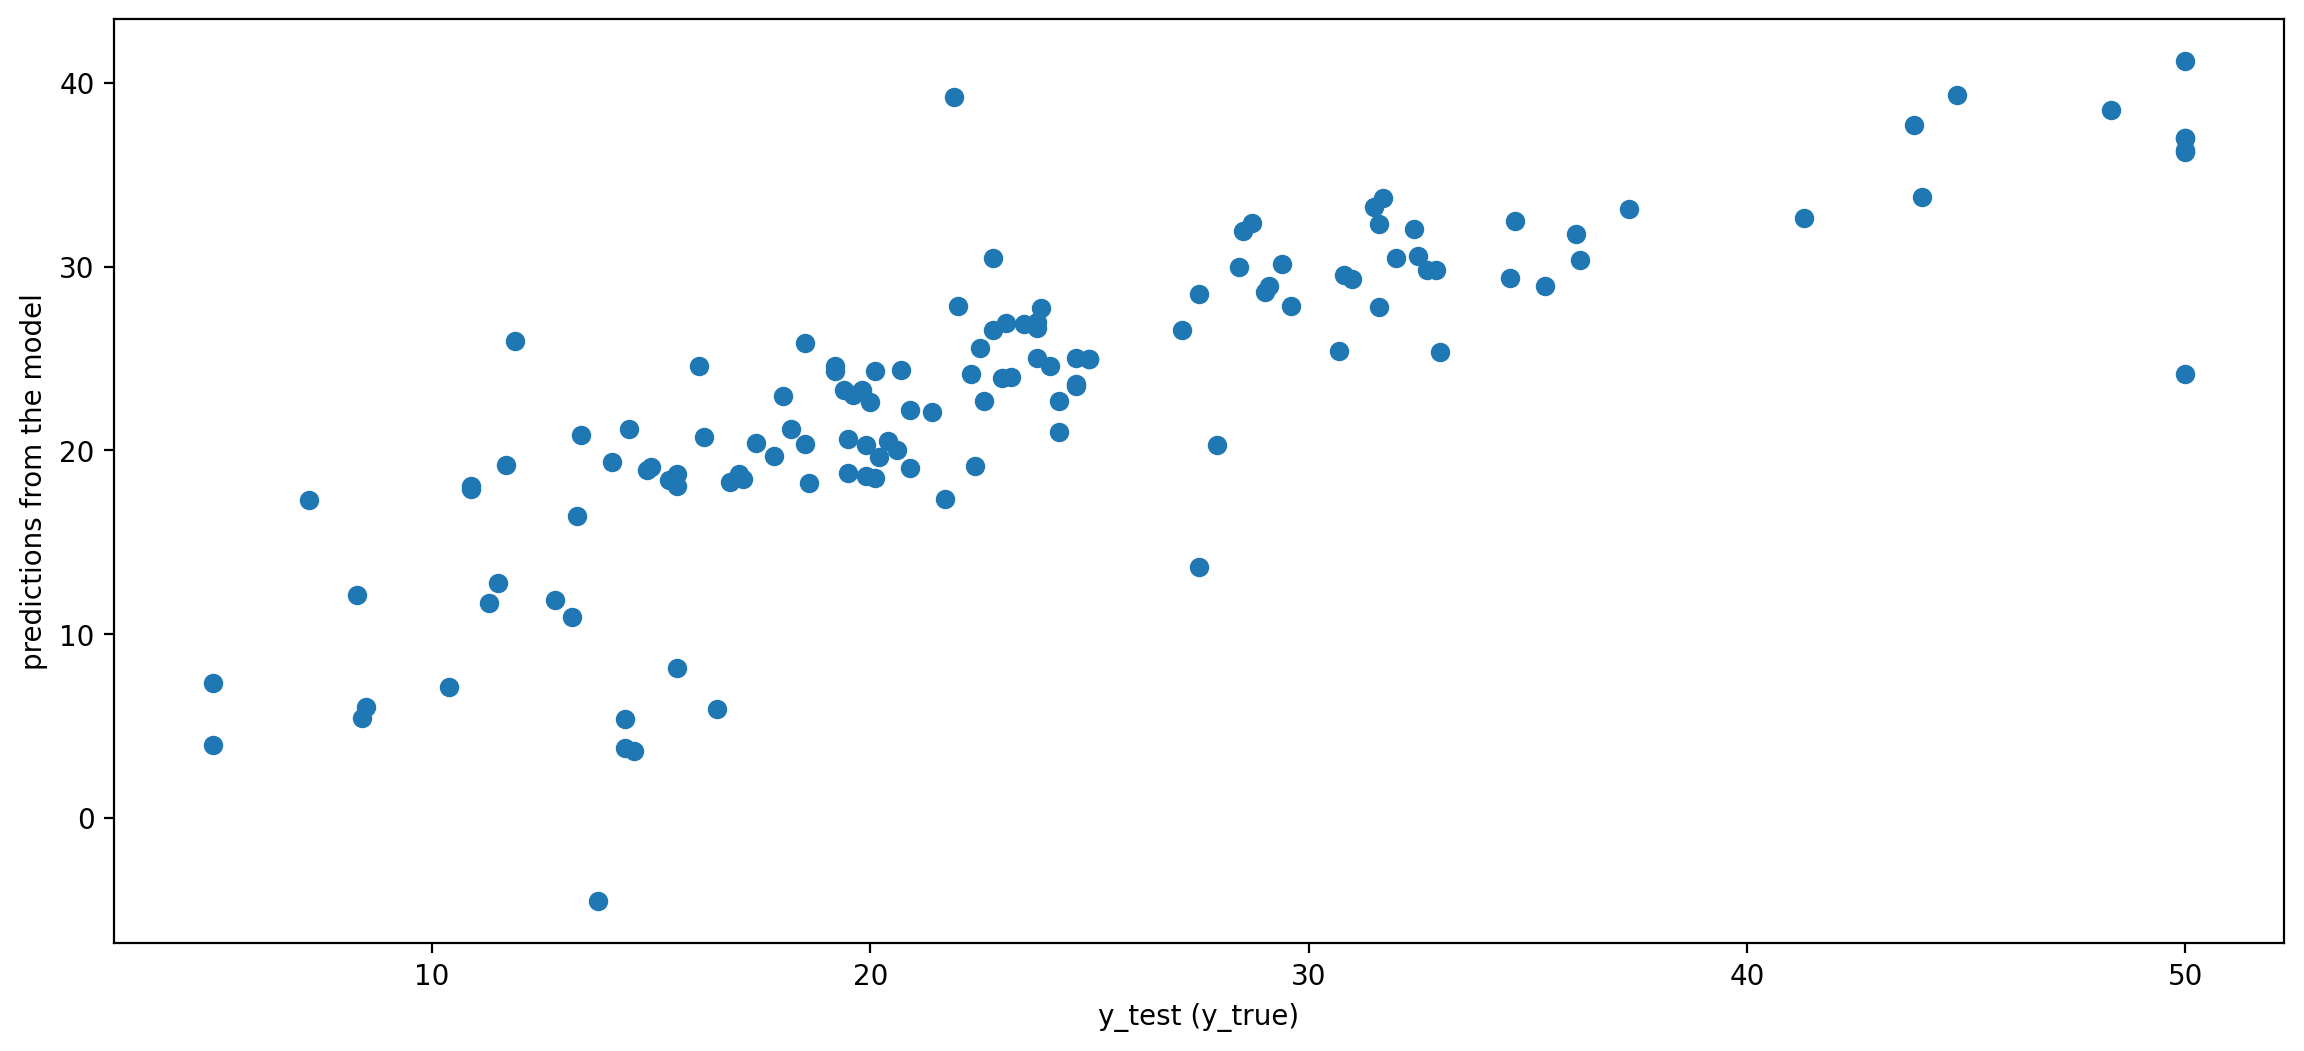

In [85]:
plt.figure(figsize=(14,6))
plt.scatter(x=y_test, y=predictions)
plt.xlabel('y_test (y_true)')
plt.ylabel('predictions from the model');

# SECTION 5: Model Evaluation

In statistics, scedasticity is the distribution of error terms, they can either be distributed randomly and with constant variance (homoscedasticity) or with some kind of pattern (heteroscedasticity).

Red dotted line shows the mean value '0.5449' of residuals (y_test-predictions). THIS IS NOT THE MODEL LINE!


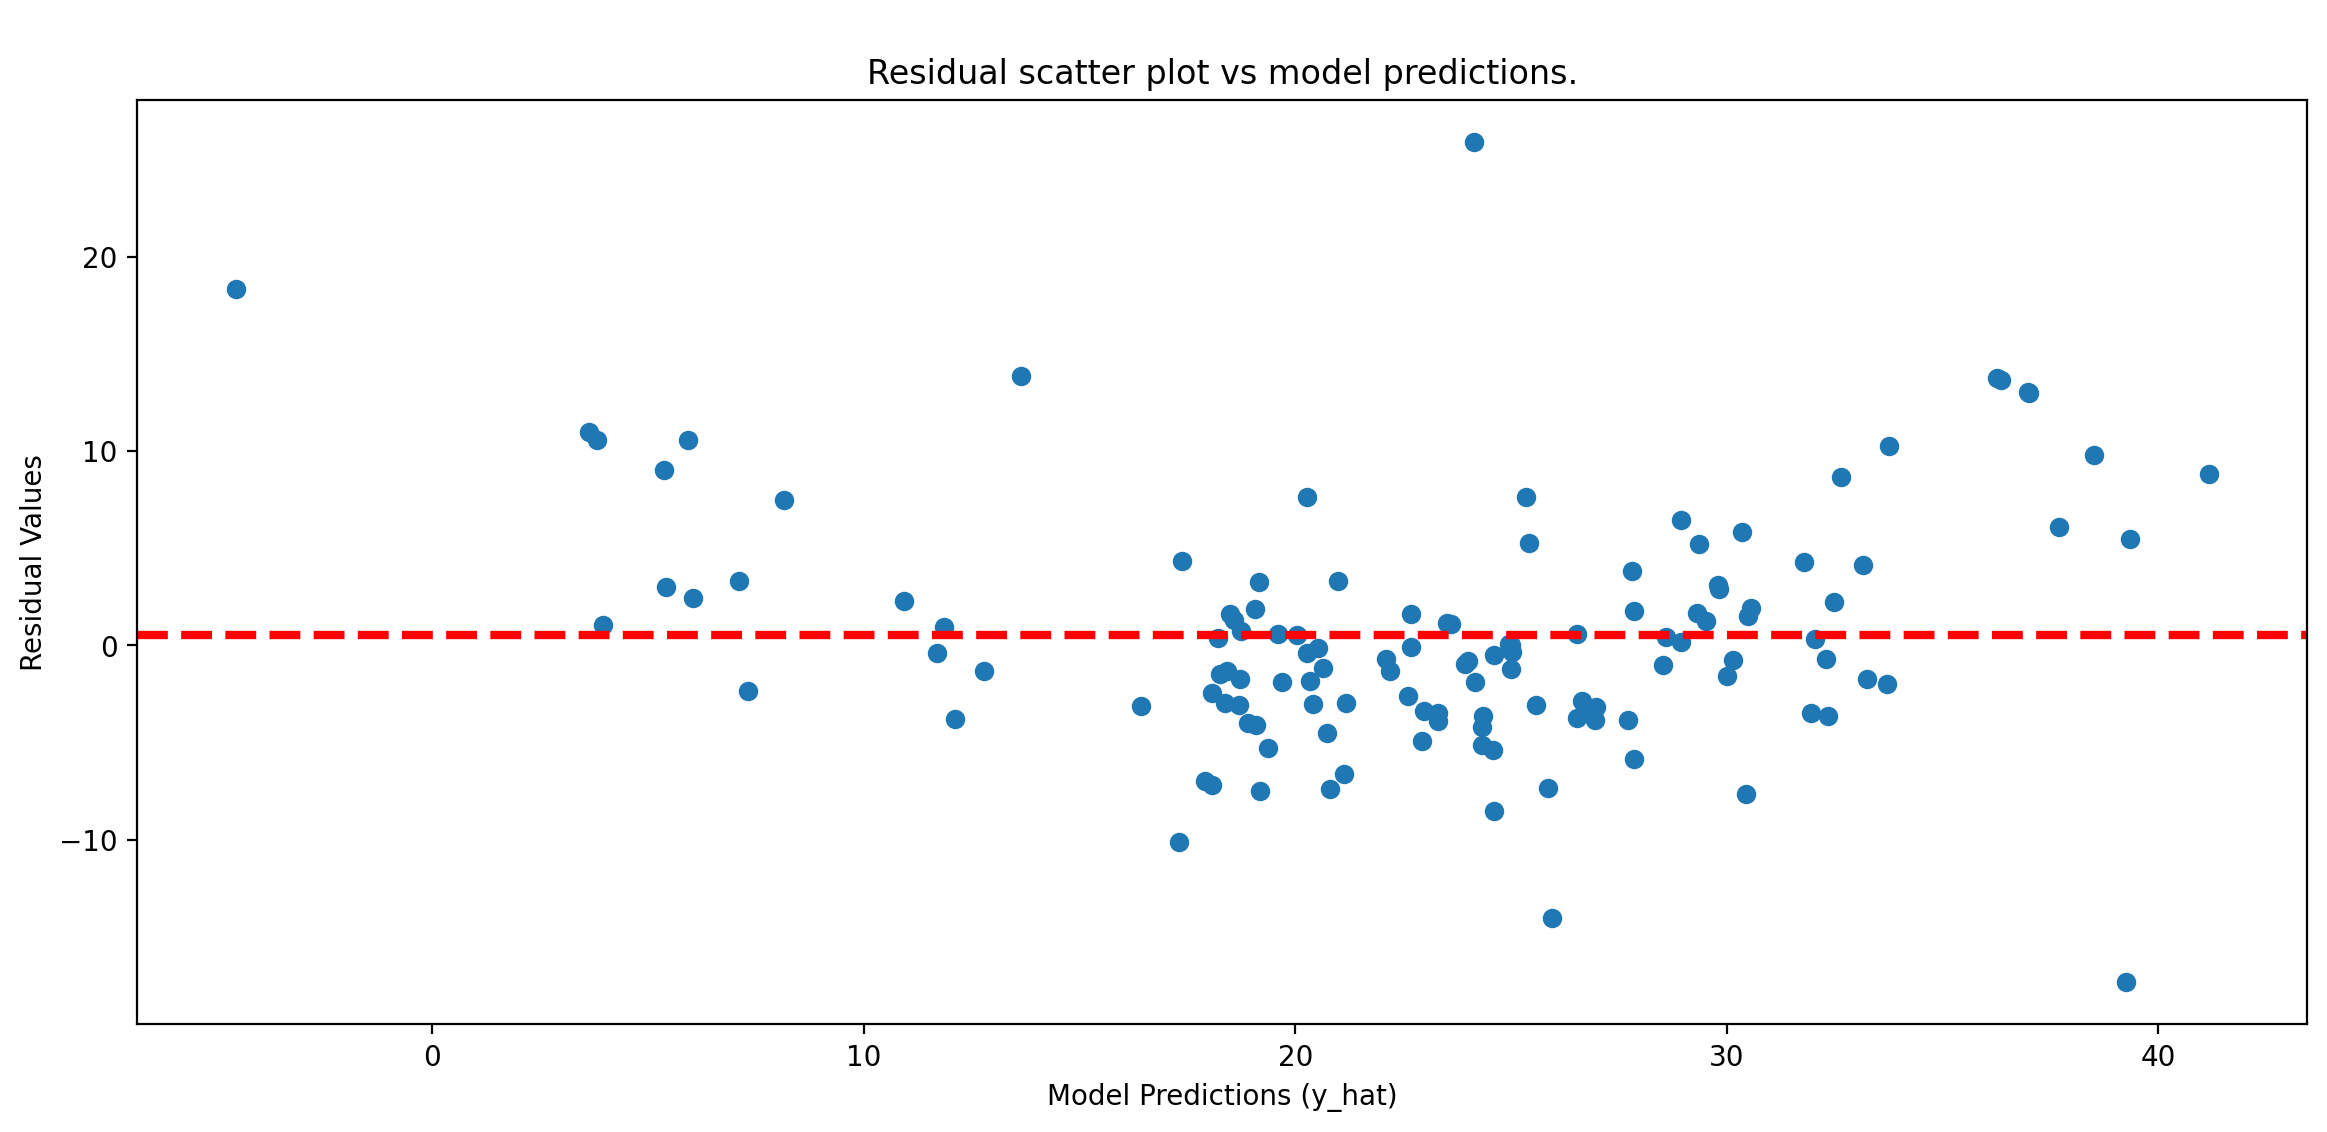

In [86]:
# Residual Histogram
plt.figure(figsize=(14,6))
print("Red dotted line shows the mean value '{}' of residuals (y_test-predictions). \
THIS IS NOT THE MODEL LINE!".format(
    round(np.mean(y_test-predictions),4)
))
plt.axhline(y=np.mean(y_test-predictions), color='r', ls='--', linewidth=3)
plt.scatter(predictions, y_test-predictions); # kde=True, bins=100
plt.xlabel('Model Predictions (y_hat)')
plt.ylabel('Residual Values')
plt.title('\nResidual scatter plot vs model predictions.');

## SECTION 5.1: Residual Histogram

TRAINING DATA (X_train, y_train)
Mean of the residual:  0.0
Sum of the residual:  0.0

TEST DATA (X_test, y_test)
Mean of the residual:  0.5449
Sum of the residual:  69.2019


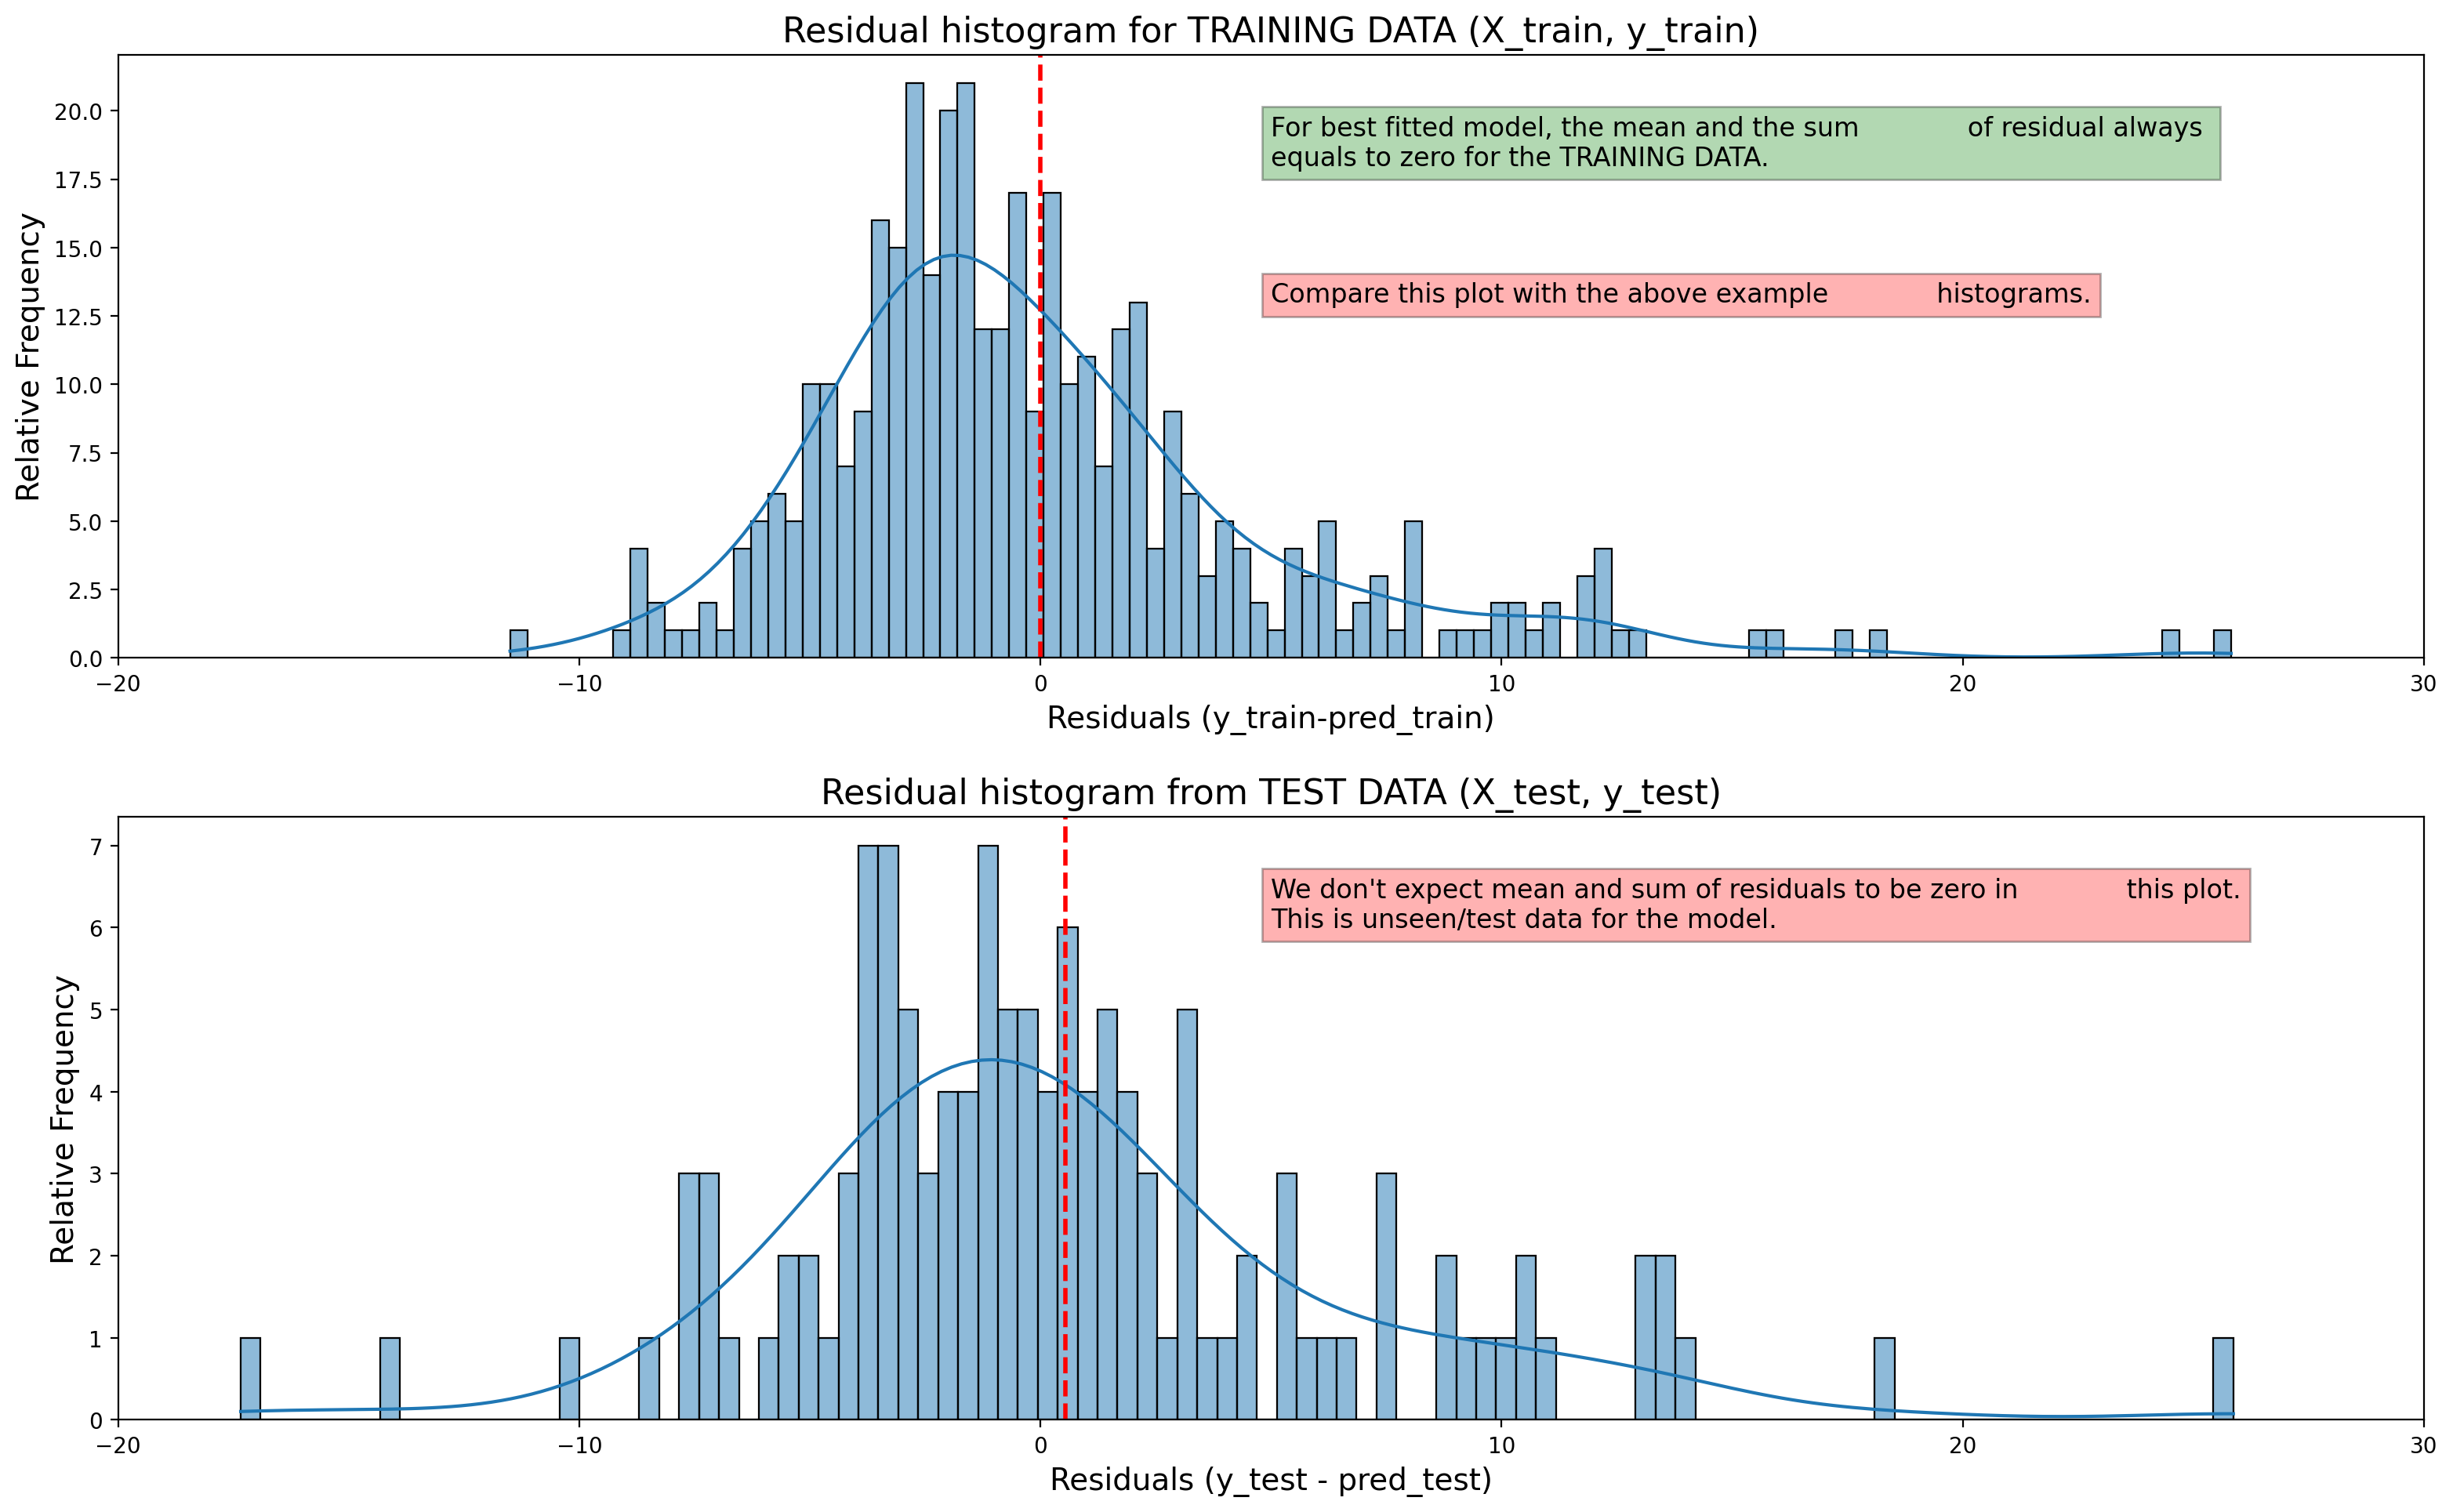

In [87]:
pred_train = lm.predict(X_train)
print("TRAINING DATA (X_train, y_train)")
print("Mean of the residual: ", abs(round(np.mean(y_train-pred_train),4)))
print("Sum of the residual: ", abs(round(np.sum(y_train-pred_train),4)))

# Residual Histogram
# Training Data
fig1, ax1 = plt.subplots(nrows=2, figsize=(16,10))
sns.histplot(data=y_train-pred_train, ax=ax1[0], kde=True, bins=100);

ax1[0].axvline(x=np.mean(y_train-pred_train), color='r', ls='--',
               linewidth=2)
ax1[0].set_title("Residual histogram for TRAINING DATA \
(X_train, y_train)", fontsize=16)
ax1[0].set_xlabel('Residuals (y_train-pred_train)', fontsize=14)
ax1[0].set_ylabel('Relative Frequency', fontsize=14)
ax1[0].set_xlim(-20, 30)

# putting some text on the plot
ax1[0].text(x=5, y=18, bbox=dict(facecolor='green', alpha=0.3), \
            fontsize=12, s="For best fitted model, the mean and the sum \
            of residual always \nequals to zero for the TRAINING DATA.")
ax1[0].text(x=5, y=13, bbox=dict(facecolor='red', alpha=0.3), \
            fontsize=12, s="Compare this plot with the above example \
            histograms.")

# Test Data
print("\nTEST DATA (X_test, y_test)")
print("Mean of the residual: ", round(np.mean(y_test-predictions),4))
print("Sum of the residual: ", round(sum(y_test-predictions),4))
sns.histplot(data=y_test-predictions, ax=ax1[1], kde=True, bins=100);

ax1[1].axvline(x=np.mean(y_test-predictions), color='r', ls='--',
               linewidth=2)
ax1[1].set_xlabel('Residuals (y_test - pred_test)', fontsize=14)
ax1[1].set_ylabel('Relative Frequency', fontsize=14)
ax1[1].set_title('Residual histogram from TEST DATA (X_test, y_test)',
                fontsize=16)
ax1[1].set_xlim(-20, 30)

# putting some text on the plot
ax1[1].text(x=5, y=6, bbox=dict(facecolor='red', alpha=0.3), fontsize=12,
            s="We don't expect mean and sum of residuals to be zero in \
            this plot.\nThis is unseen/test data for the model.");
fig1.tight_layout(pad=2.0)

The best model for your data is the one that gives 0 sums and means of residuals for the training data (upper plot), however, it may not be the case for your test data (lower plot).

## SECTION 5.2: R-Square and Goodness of The Fit

In [88]:
# Calling score on trained model "lm"
print("R^2 (train) - The accuracy score of our model in train part is: ",
      lm.score(X = X_train, y = y_train))
print("R^2 (test) - The accuracy score of our model on test part is: ",
      lm.score(X = X_test, y = y_test))

R^2 (train) - The accuracy score of our model in train part is:  0.6741099619947835
R^2 (test) - The accuracy score of our model on test part is:  0.641365348972747


In [89]:
# Adjusted R^2
r_2_train = lm.score(X = X_train, y = y_train)
r_2_test = lm.score(X = X_test, y = y_test)

p = len(X_train.columns) # n_features same for train & test
n_train = len(X_train)
n_test = len(X_test)

print("R^2 (adjusted) for (X_train, y_train) = ",
      (1 - (((1-r_2_train)*(n_train-1))/(n_train-p-1))))
print("R^2 (adjusted) for (X_test, y_test) = ",
      (1 - (((1-r_2_test)*(n_test-1))/(n_test-p-1))))

R^2 (adjusted) for (X_train, y_train) =  0.6697414628258127
R^2 (adjusted) for (X_test, y_test) =  0.6265457352939349


## SECTION 5.3: Regression Evaluation Metrics

In [90]:
from sklearn import metrics
# Mean Absolute Error (MAE)
print('Mean Absolute Error (MAE): ',
      metrics.mean_absolute_error(
          y_true=y_test, y_pred=predictions
      ))

# Mean Squared Error (MSE)
print('Mean Squared Error (MSE): ',
      metrics.mean_squared_error(
          y_true=y_test, y_pred=predictions
      ))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error (RMSE): ',
      np.sqrt(metrics.mean_squared_error(
          y_true=y_test, y_pred=predictions
      )))

Mean Absolute Error (MAE):  4.371769840676505
Mean Squared Error (MSE):  37.52294094311857
Root Mean Squared Error (RMSE):  6.125597190733208


# SECTION 6: Model Explainability

## SECTION 6.1: Model Explanation using LIME — Local-Interpretable-Model-Agnostic-Explanation

In [93]:
!pip install lime==0.1.1.37

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [94]:
pip install lime

In [95]:
# We need to import "explainer" function from the "lime_tabular"
# module of lime library
from lime.lime_tabular import LimeTabularExplainer

In [96]:
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    mode="regression",
    feature_names=X_train.columns
)

In [97]:
# Store any observation in X_obs for which we want to get an
# explanation.

# It's easier if we initialize i, we only need to change its value
# to explore other data points
i = 10 # ith observation
X_obs = X_train.iloc[[i], :]

# Passing the observation to the trained model "lm" to get prediction.
print("The predicted price based on the given features \
is: {} Millions\n".format(
    round(lm.predict(X_obs)[0], 2)
))
print("Let's generate how all the given features are effecting \
the predicted price for all the selected data point.\n")

# Generates explanations for a prediction

explanation = explainer.explain_instance(
    data_row=X_obs.values[0],
    predict_fn=lm.predict
)


explanation.show_in_notebook(
    show_table=True, show_all=False
)

The predicted price based on the given features is: 25.18 Millions

Let's generate how all the given features are effecting the predicted price for all the selected data point.



TypeError: ignored

## SECTION 6.2: Model Explanation using SHAP — SHapley-Additive-exPlanations

In [98]:
pip install shap

In [99]:
import shap
shap.initjs()

In [100]:
# Initializing explainer from shap,
# lm is our trained model

explainer_shap = \
shap.Explainer(
    model=lm, masker=X_train
)

# Computing shap values for train dataset
shap_values = explainer_shap.shap_values(X_train)

In [101]:
# The base value,
# the reference value that the feature contributions start from.

print("The base value is: ",
      explainer_shap.expected_value)

The base value is:  23.45163636447573


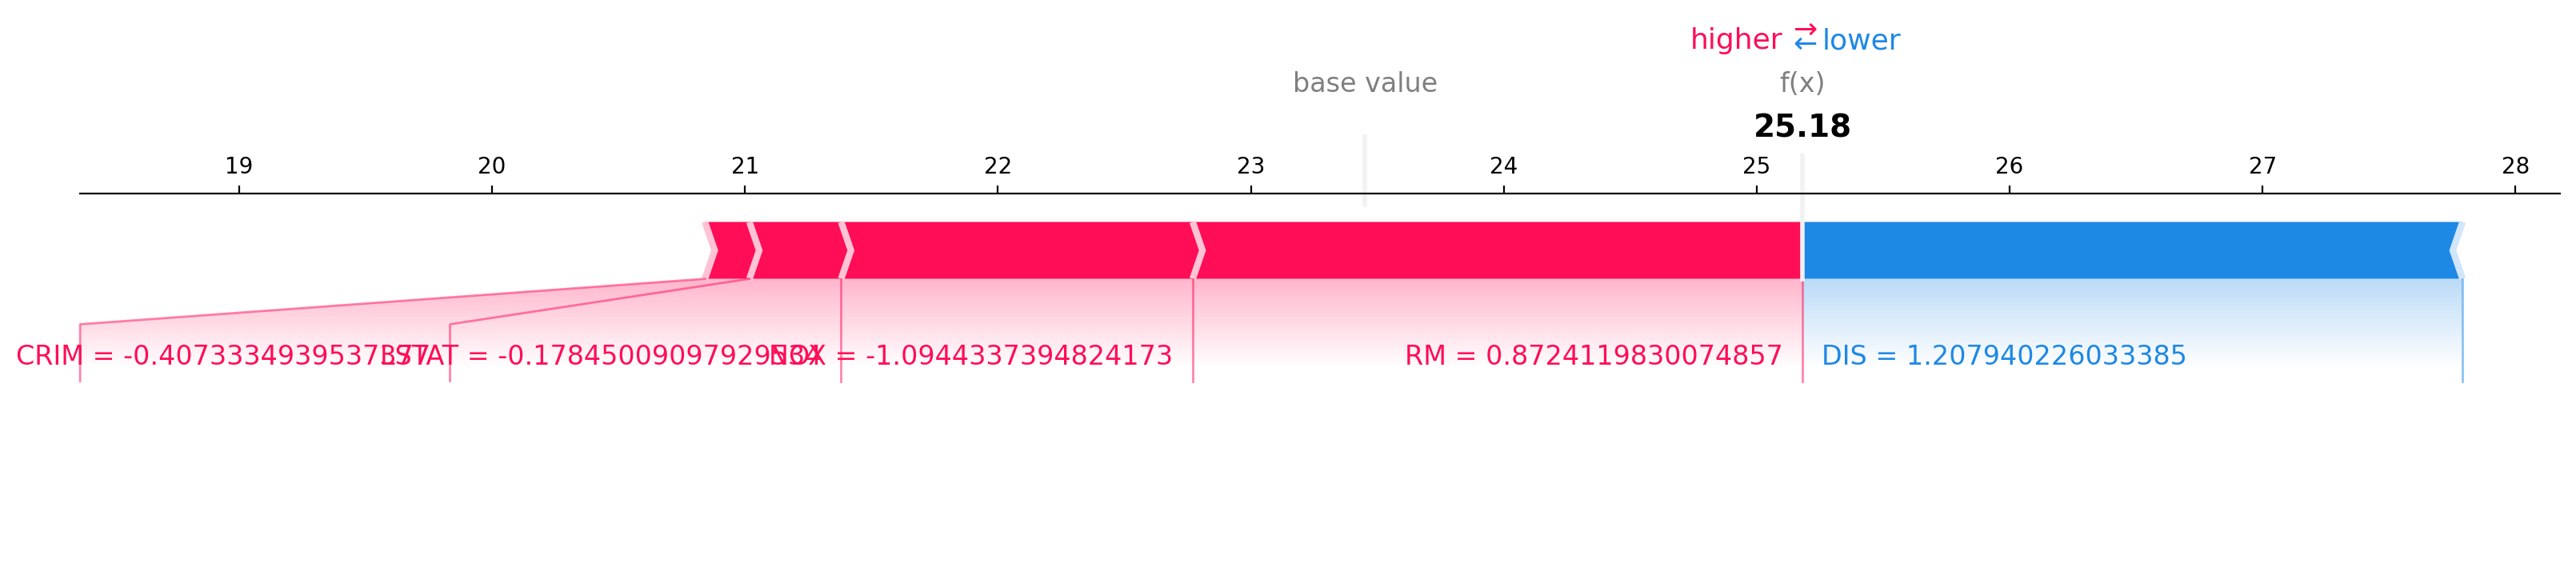

In [102]:
# Explaining the ith observation.
# Visualize the ith prediction's explanation
# (use matplotlib=True to avoid JavaScript).

shap.force_plot(
    base_value=explainer_shap.expected_value,
    shap_values=shap_values[i,:],
    features=X_train.iloc[i,:],
    matplotlib=True
)

Red shows the features pushing the prediction to higher where are features pushing the prediction to lower are in blue color.

In [105]:
shap.initjs()
shap.force_plot(
    base_value=explainer_shap.expected_value,
    shap_values=shap_values,
    features=X_train
)

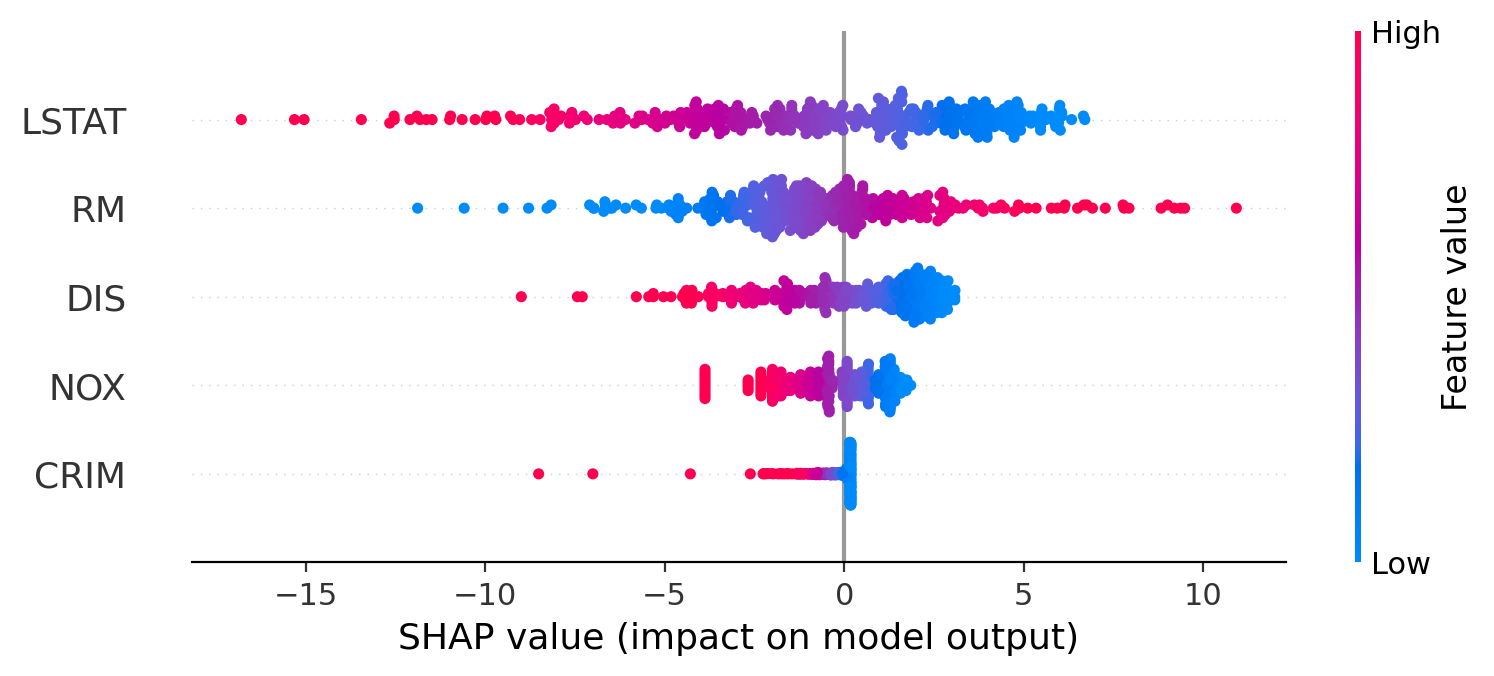

In [106]:
shap.summary_plot(shap_values, X_train)

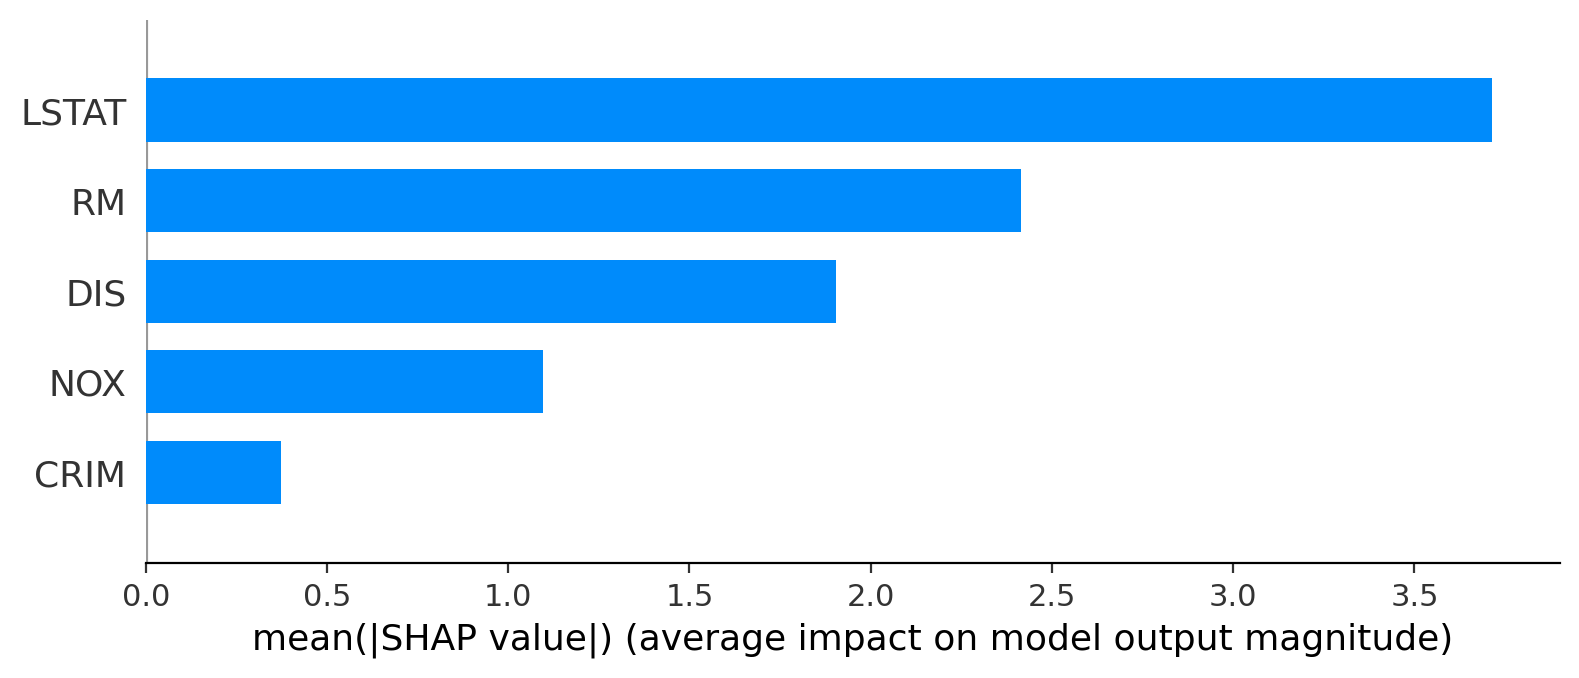

In [107]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [108]:
import pickle

In [110]:
# save the model to disk
filename = '/content/drive/MyDrive/final_model.sav'

# lm is our model
# file will be stored on the disk, see the working directory
# wb stands for writing onlu in binary format
pickle.dump(lm, open(filename, 'wb'))

In [112]:
# load the model from the disk
# rb stands for read only in binary
loaded_model = pickle.load(open(filename, 'rb'))

# SECTION 7: Model Deployment in the Notebook using `ipywidgets`

In [113]:
import ipywidgets as widgets
from IPython.display import display

class input_house_features():
  def __init__(self, CRIM=1.513, RM=10, LSTAT=35.97, DIS=25.64, NOX=0.022):
    # Crime rate
    self.CRIM = widgets.BoundedFloatText(description = 'Crime rate: ',
                                         value = CRIM, min = 0, max = 100,
                                         step = 0.2,
                                         style =
                                          {'description_width': 'initial'})

    # No. of rooms
    self.RM = widgets.BoundedFloatText(description =
                                       'No. of rooms: ',
                                       value = RM, min = 0, max = 50,
                                       step = 0.5, style =
                                       {'description_width': 'initial'})

    # Population status
    self.LSTAT = widgets.BoundedFloatText(description =
                                          'Lower status of population: ',
                                          value = LSTAT, min = 0, max = 100,
                                          step = 0.2, style =
                                          {'description_width': 'initial'})

    # Distance
    self.DIS = widgets.BoundedFloatText(description =
                                        'Distance: ',
                                        value = DIS, min = 0, max = 1000,
                                        step = 0.1, style =
                                        {'description_width': 'initial'})
    # Nitric oxide concentration
    self.NOX = widgets.BoundedFloatText(description =
                                        'Nitric oxide concentration: ',
                                        value = NOX, min = 0, max = 100,
                                        step = 0.05, style =
                                        {'description_width': 'initial'})

    display(self.CRIM, self.RM, self.LSTAT, self.DIS, self.NOX)

print("\nEnter observed features to get estimate of the house price:\n")
# get_input is an instance of our class "input_house_features"
get_input = input_house_features()


Enter observed features to get estimate of the house price:



BoundedFloatText(value=1.513, description='Crime rate: ', step=0.2, style=DescriptionStyle(description_width='…

BoundedFloatText(value=10.0, description='No. of rooms: ', max=50.0, step=0.5, style=DescriptionStyle(descript…

BoundedFloatText(value=35.97, description='Lower status of population: ', step=0.2, style=DescriptionStyle(des…

BoundedFloatText(value=25.64, description='Distance: ', max=1000.0, step=0.1, style=DescriptionStyle(descripti…

BoundedFloatText(value=0.022, description='Nitric oxide concentration: ', step=0.05, style=DescriptionStyle(de…

In [116]:
# load the model from disk
filename = '/content/drive/MyDrive/final_model.sav'

model = pickle.load(open(filename, 'rb'))

# getting input
X_observed = {
    "CRIM": [get_input.CRIM.value],
    "RM" : [get_input.RM.value],
    "LSTAT": [get_input.LSTAT.value],
    "DIS": [get_input.DIS.value],
    "NOX": [get_input.NOX.value]
}
print("\nThe observed features of the house: \n", X_observed)
print("\nLoading saved transformation for feature scaling.")

# loading transformation
scaler = pickle.load(file=
                     open(
                        file='/content/drive/MyDrive/transformation.pkl',
                     mode='rb'))
print("Scaling the given features.")
X_observed_scaled = scaler.transform(pd.DataFrame(X_observed))
print("\nThe observed features of the house after scaling transformation:")
print("CRIM: {}, RM: {}, LSTAT: {}, DIS: {}, NOX: {}".format(
    round(X_observed_scaled[0][0],3),
    round(X_observed_scaled[0][1],3),
    round(X_observed_scaled[0][2],3),
    round(X_observed_scaled[0][3],3),
    round(X_observed_scaled[0][4],3),
))

predicted_price = round(model.predict(X_observed_scaled)[0],2)
if predicted_price < 0.0:
  # We do not want to sell in -ve price
  print("\nSorry, this house is not in sellable conditions.")
else:
  print("\nEstimated house price, based on the observed features is:\
  {} Millions\n".format(predicted_price))


The observed features of the house: 
 {'CRIM': [2.0], 'RM': [10.0], 'LSTAT': [20.0], 'DIS': [27.8], 'NOX': [0.0]}

Loading saved transformation for feature scaling.
Scaling the given features.

The observed features of the house after scaling transformation:
CRIM: -0.188, RM: 5.293, LSTAT: 1.03, DIS: 11.411, NOX: -4.792

Estimated house price, based on the observed features is:  15.26 Millions

